<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/LendingClub_Loan_Credit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

## Installing Libraries

In [ ]:
# !pip install inflection
# !pip install dython
# !pip install missingno

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# ! pip install --upgrade scikit-learn
# !pip install --upgrade scipy
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Importing Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# missing values
import missingno as msno

# CamelCase to snake_case
import inflection

# association between attributes
from dython.nominal import associations

# Dataset Overview

## Reading Dataset

In [2]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Duplicated Values

In [4]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [5]:
data.select_dtypes(include=np.number).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical

In [6]:
data.select_dtypes(exclude=np.number).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


## Missing Values

### Tabular

In [7]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
dti_joint,466285,100
annual_inc_joint,466285,100
total_cu_tl,466285,100
inq_fi,466285,100
all_util,466285,100
max_bal_bc,466285,100
open_rv_24m,466285,100
open_rv_12m,466285,100
il_util,466285,100
total_bal_il,466285,100


### Bar Plot

<AxesSubplot:>

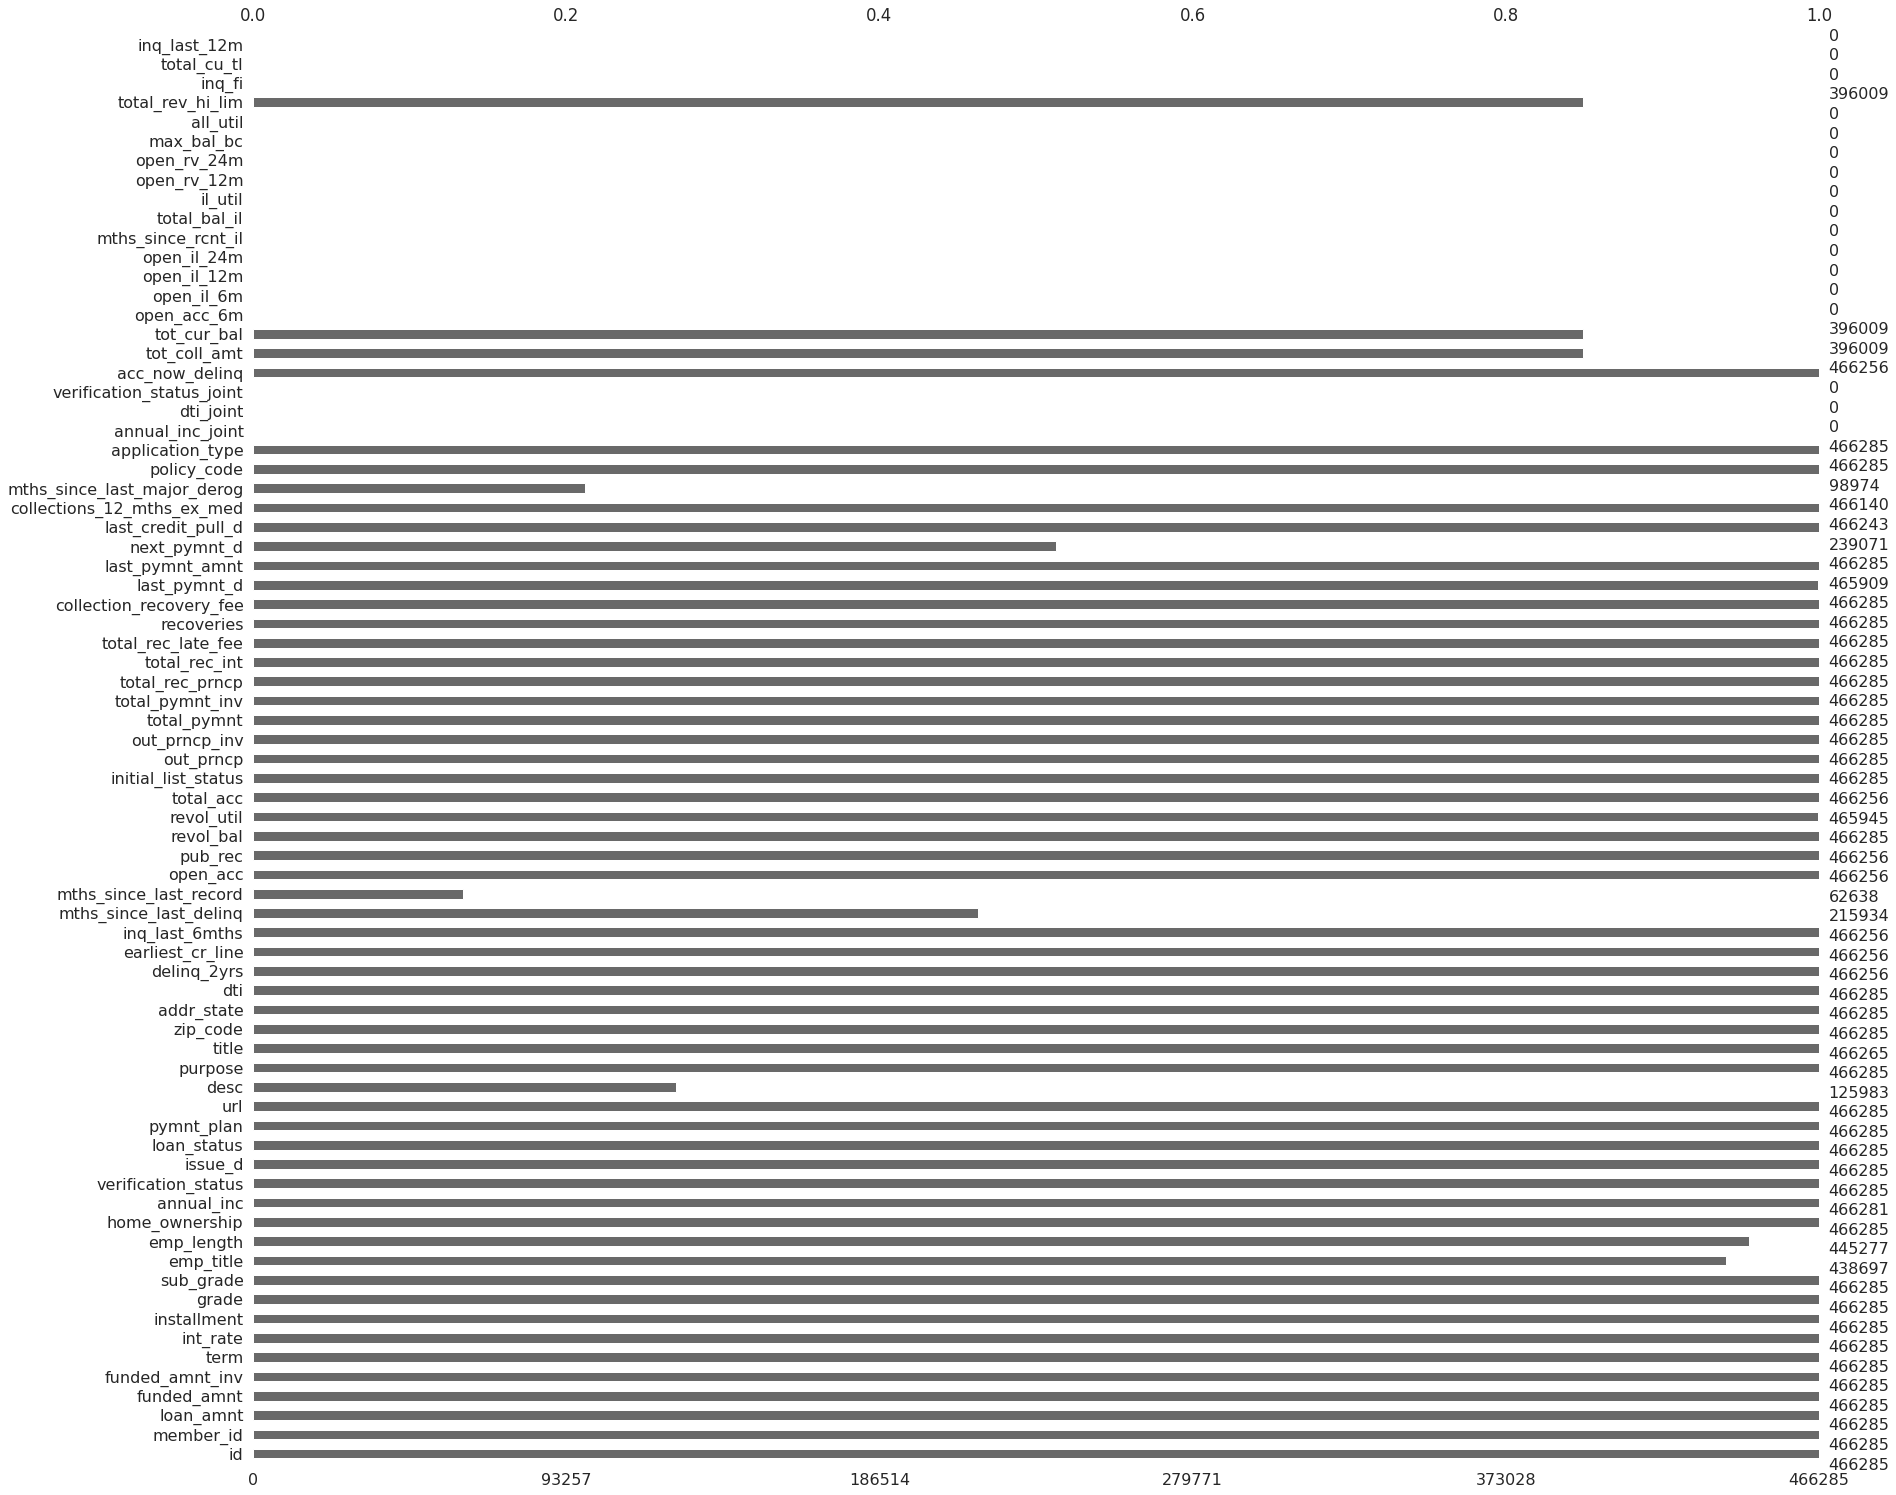

In [8]:
msno.bar(data)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns contain only missing values.

### Correlation Heatmap

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
<br><br>

Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).
<br><br>

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

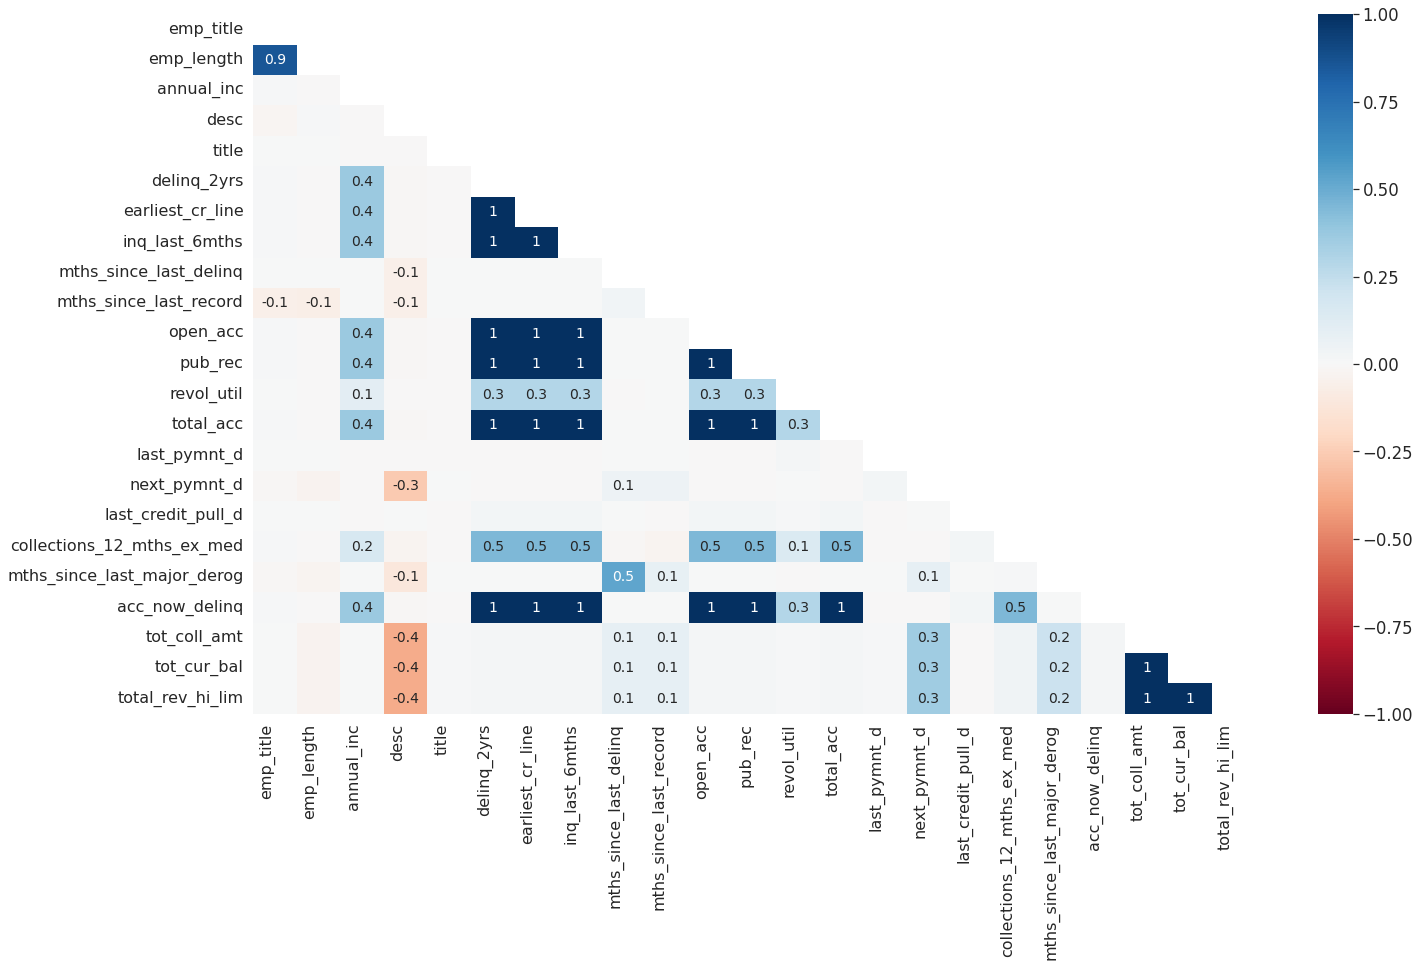

In [9]:
msno.heatmap(data, label_rotation=90)

- In this dataset, we can see that there are many columns that have perfect correlation (correlation = 1). For example, it seems that if the `tot_rev_hi_lim` is null, then the `total_coll_amt` and `tot_cur_bal` are null too.
- Employment title (`emp_title`) and employment lenght (`emp_length`) have high correlation, but not perfect. We can recheck those columns.

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.
<br><br>

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.
<br><br>

Source: [missingno documentation](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

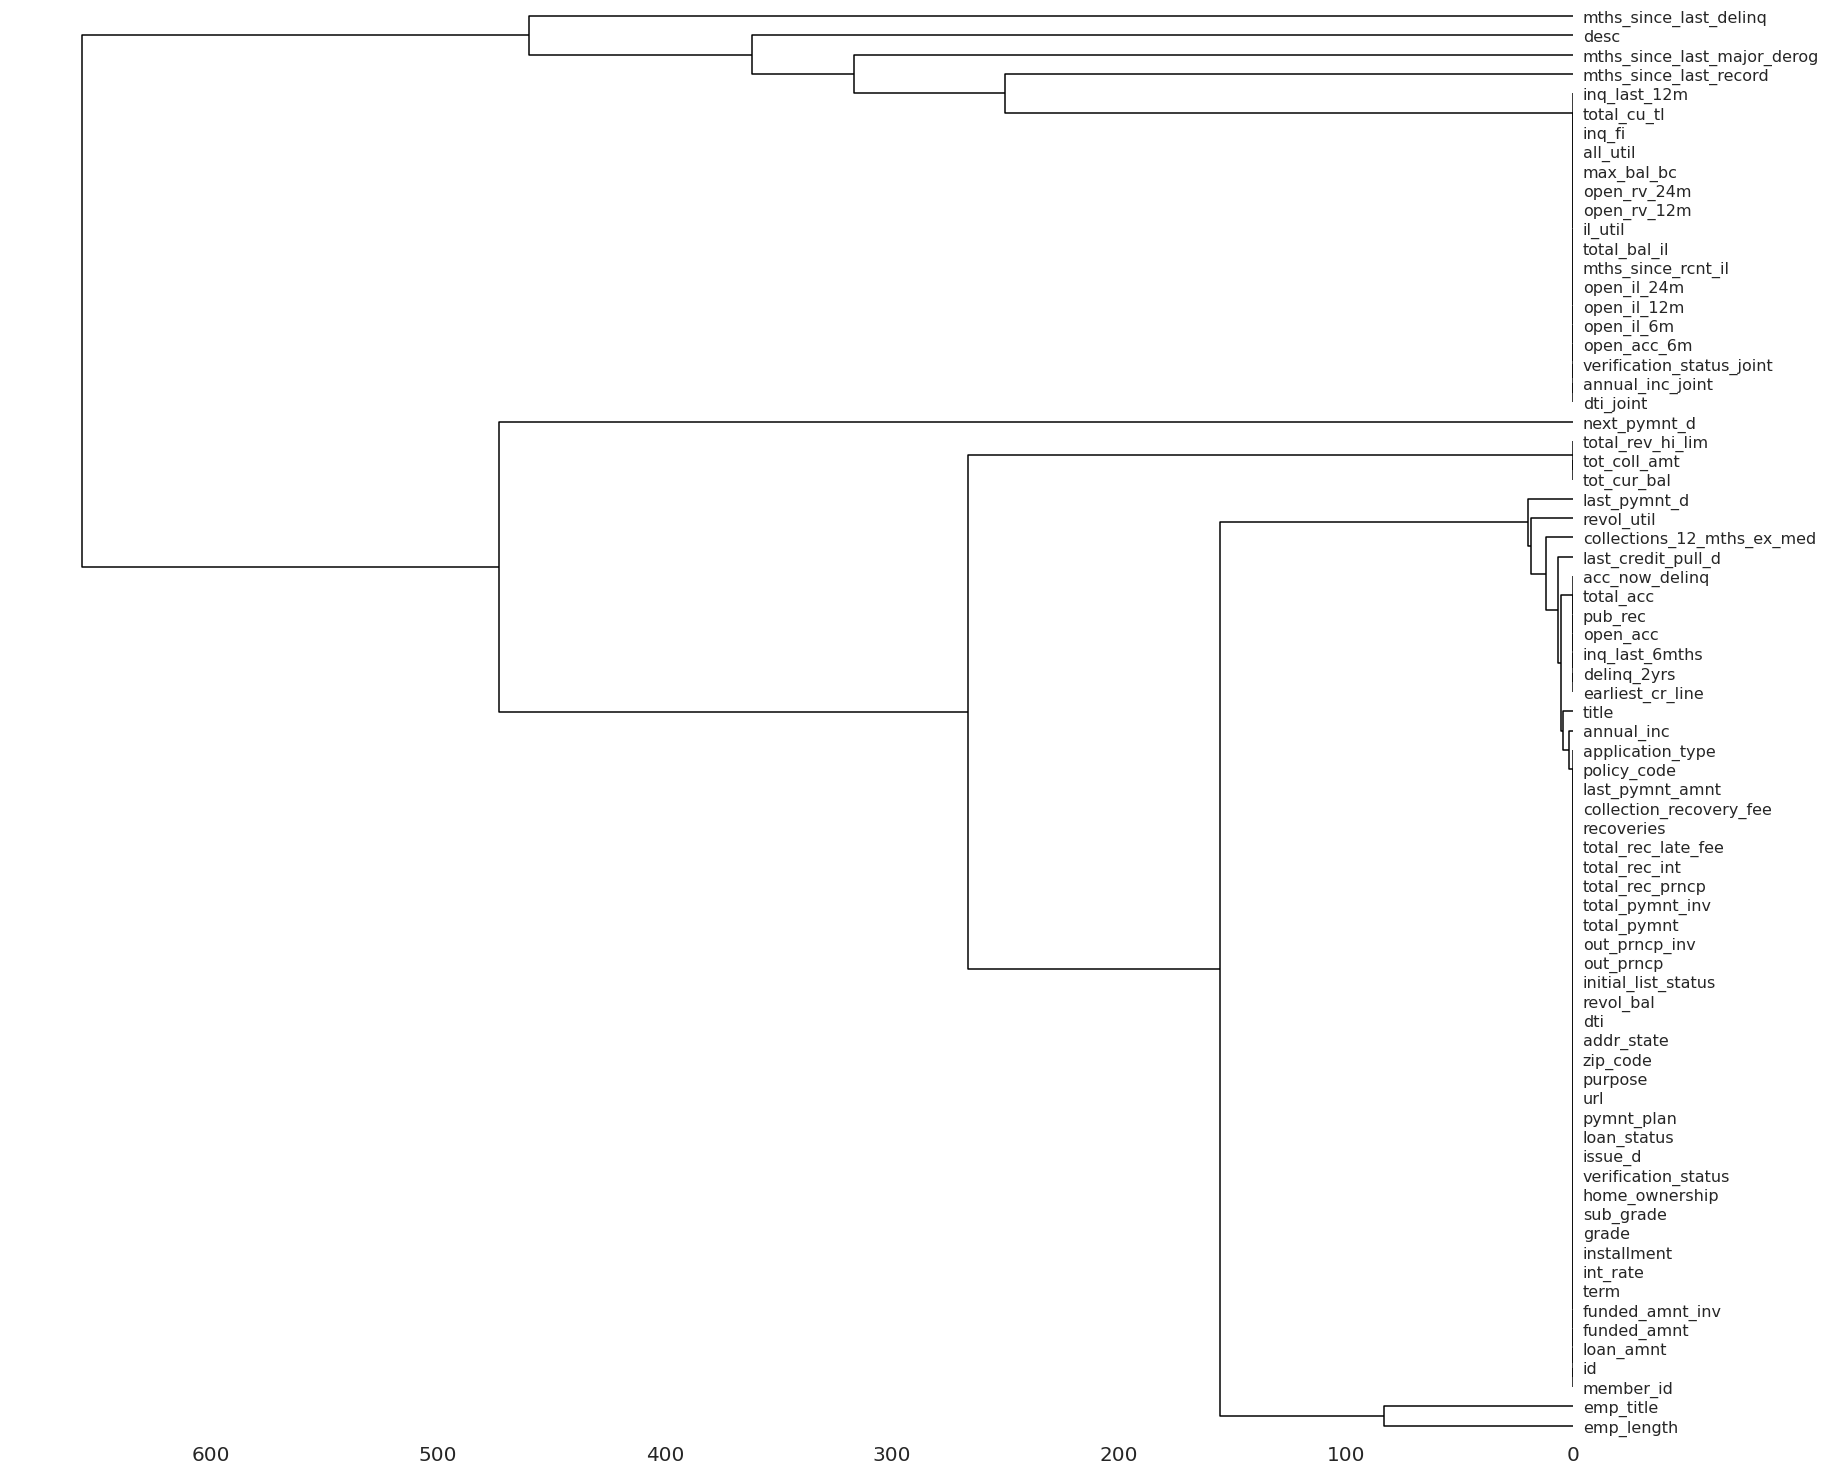

In [10]:
msno.dendrogram(data)

### Missing Values Location

<AxesSubplot:>

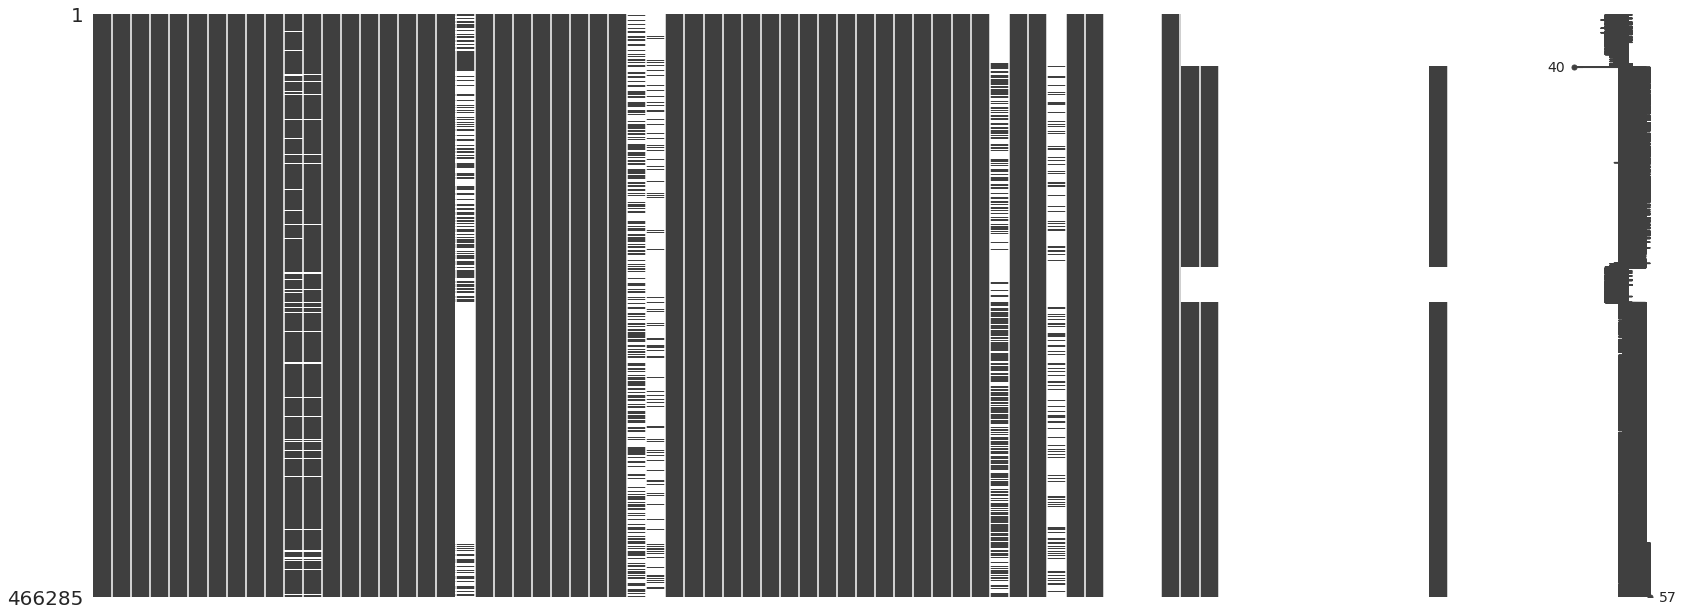

In [11]:
msno.matrix(data)

## Dropping Columns with Many Missing Values

Up to now, I still don't know the right 'rule' about the tolerance of missing values. If you have any clue, please tell me.
<br><br>
So, for this project, I will just drop some columns with missing values of more than 40%. 

### Dropping Columns

In [12]:
data.shape

(466285, 74)

In [13]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


### Update Missing Value List

In [14]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
total_rev_hi_lim,70276,15
tot_coll_amt,70276,15
tot_cur_bal,70276,15
emp_title,27588,6
emp_length,21008,5
last_pymnt_d,376,0
revol_util,340,0
collections_12_mths_ex_med,145,0
last_credit_pull_d,42,0
delinq_2yrs,29,0


In [15]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [16]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Exploratory Data Analysis

## Visualization Function

In [233]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True, annot=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Good', 'Bad'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(x=i,
                    y=(y_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(y=i,
                    x=(x_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Loan Credit Risk Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Variable

### Identifying Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [45]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [46]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [145]:
good_status = ['Fully Paid', 'Current']

data_viz = data.copy()

data_viz['target'] = data_viz['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

### Target Distribution

<AxesSubplot:xlabel='count', ylabel='loan_status'>

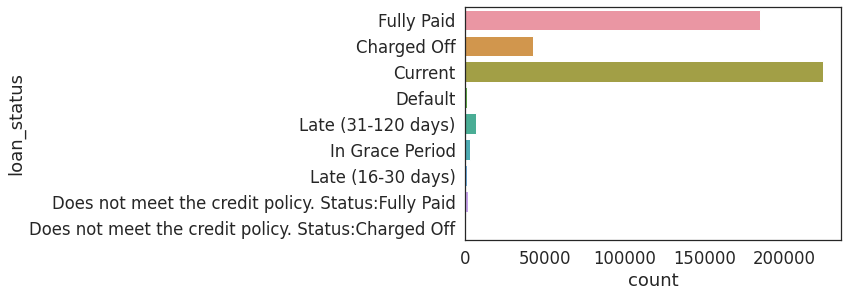

In [146]:
sns.countplot(data=data_viz, y='loan_status')

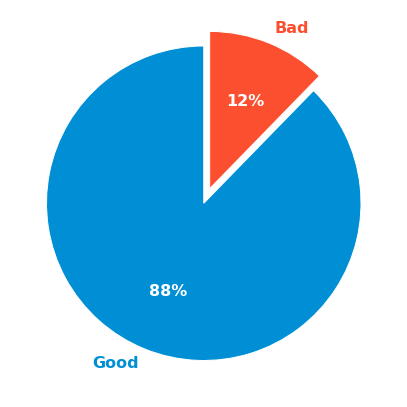

In [147]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

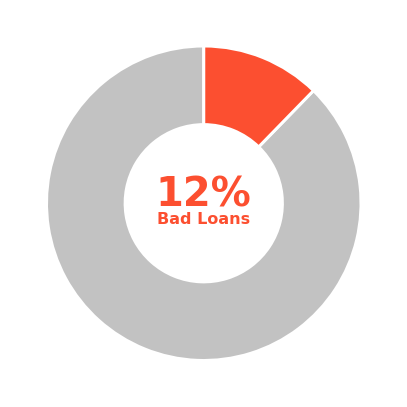

In [148]:
pie_data = data_viz['target'].value_counts(normalize=True).values * 100
pie_label = data_viz['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Bad Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

## Employment Title and Length

Let's take a look at the missing values on the employment title and employment length columns

<AxesSubplot:>

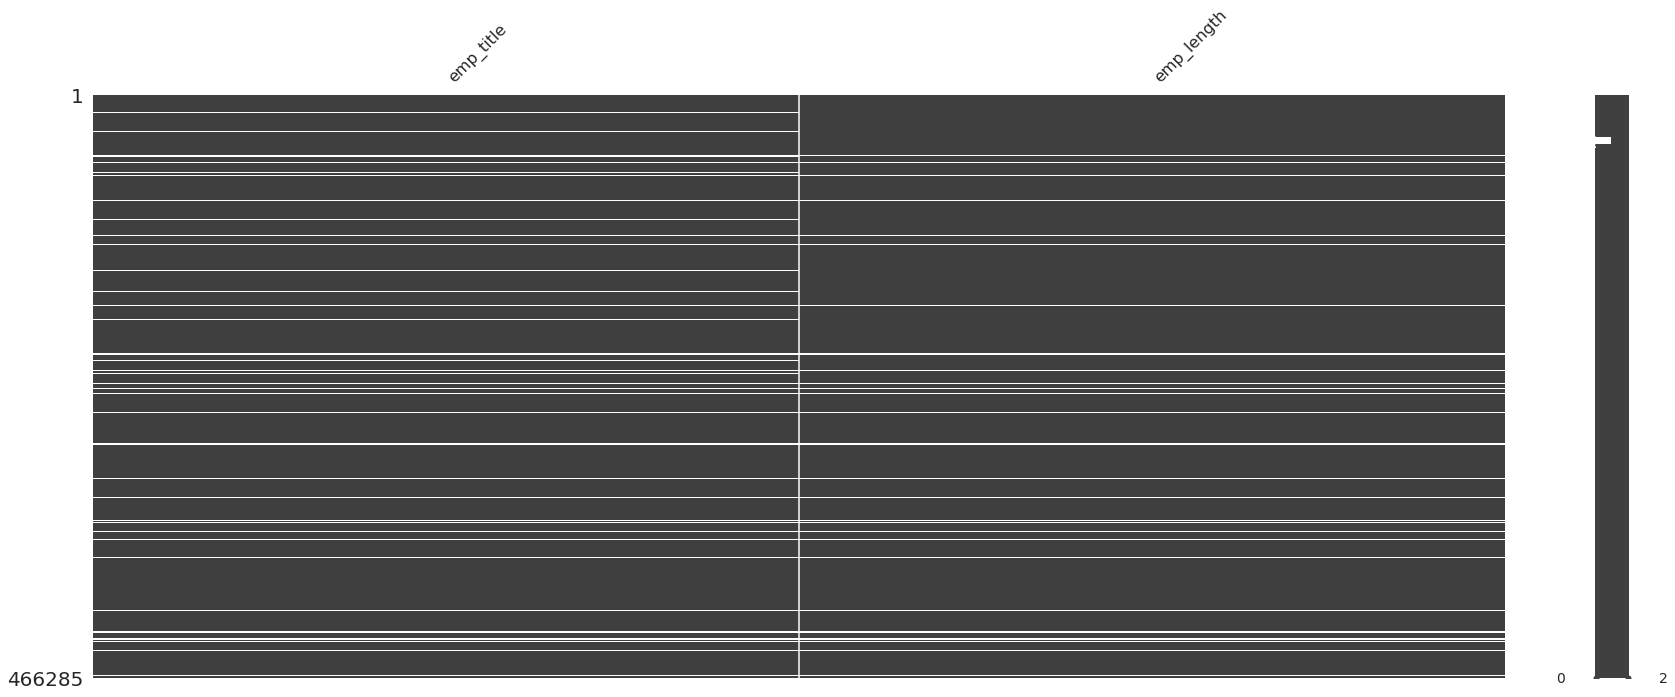

In [149]:
msno.matrix(data_viz.loc[:, ['emp_title', 'emp_length']])

It seems that, if the employment length is null, then the employment title is always null. I assume that the borrowers are job seekers, unemployed, fresh graduate, or something else that doesn't have any working experience.

In [150]:
mask_1 = data_viz['emp_title'].astype(str).str.lower().str.contains('college|student|graduate')
mask_2 = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

mask = mask_1 & (~mask_2)

data_viz.loc[mask, ['emp_title', 'emp_length']].sort_values(by='emp_length').head()

,emp_title,emp_length
136042,first student,10+ years
93583,Calvin College,10+ years
183527,West Georgia Technical College,10+ years
183588,Tacoma Community College,10+ years
184122,OLOL College,10+ years


In [151]:
data_viz.loc[mask, 'emp_length'].value_counts().sort_index()

10+ years    502
2 years      152
3 years      172
4 years      131
5 years      131
6 years      106
7 years      100
8 years       76
9 years       76
Name: emp_length, dtype: int64

However, if I search for `college`, `student`, or `graduate` in the employment title, the most frequent employment length is `10+ years`. So, I can't really figure out what is their job.

In [152]:
mask_1 = data_viz['emp_title'].astype(str).str.lower().str.contains('graduate')
mask_2 = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

mask = mask_1 & (~mask_2)

data_viz.loc[mask, ['emp_title', 'emp_length']].sort_values(by='emp_length', ascending=False).head()

,emp_title,emp_length
81194,Manager of Graduate Programs,8 years
284694,"Dean of Graduate, Adult, Online Programs",7 years
70696,Director of Graduate Student Services,7 years
384029,Graduate Engineer 1,7 years
443392,Graduate Student/Instructor,6 years


In [153]:
mask = data_viz['emp_length'].astype(str).str.contains('1 year|< 1 year')

data_viz.loc[mask, ['annual_inc']].describe()

,annual_inc
count,6.588e+04
mean,6.863e+04
std,4.634e+04
min,1.896e+03
25%,4.000e+04
50%,5.800e+04
75%,8.500e+04
max,2.040e+06


In [154]:
tmp = data_viz.groupby(by='emp_length', dropna=False)['annual_inc'].describe()

tmp.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
emp_length,,,,,,,,
1 year,29622.000,69023.266,46606.889,1896.000,40000.000,58000.000,85000.000,1200000.000
10+ years,150049.000,80190.100,63506.342,8088.000,52000.000,70000.000,95000.000,7500000.000
2 years,41373.000,70951.243,47794.315,4000.000,42000.000,60000.000,85000.000,1950000.000
3 years,36596.000,71749.490,52189.185,4200.000,43000.000,60000.000,86000.000,3900000.000
4 years,28023.000,71573.294,48152.744,8004.000,43367.000,60000.000,85000.000,1600000.000
5 years,30774.000,72330.767,66286.916,7000.000,44500.000,60000.000,86000.000,7446395.000
6 years,26112.000,71982.836,45389.310,9000.000,45000.000,61000.000,85811.855,1250000.000
7 years,26180.000,73108.204,47895.798,6000.000,45000.000,62000.000,87000.000,1500000.000
8 years,22395.000,74064.827,56870.934,7062.000,46000.000,63300.000,88893.000,4900000.000


In [155]:
tmp = data_viz.groupby(by='emp_length', dropna=False)['annual_inc'].agg(['mean', 'std', 'median', 'min', 'max'])

tmp.style.background_gradient()

,mean,std,median,min,max
emp_length,,,,,
1 year,69023.266,46606.889,58000.000,1896.000,1200000.000
10+ years,80190.100,63506.342,70000.000,8088.000,7500000.000
2 years,70951.243,47794.315,60000.000,4000.000,1950000.000
3 years,71749.490,52189.185,60000.000,4200.000,3900000.000
4 years,71573.294,48152.744,60000.000,8004.000,1600000.000
5 years,72330.767,66286.916,60000.000,7000.000,7446395.000
6 years,71982.836,45389.310,61000.000,9000.000,1250000.000
7 years,73108.204,47895.798,62000.000,6000.000,1500000.000
8 years,74064.827,56870.934,63300.000,7062.000,4900000.000


As we can see, borrowers that have `nan` in the `emp_length` have the lowest annual income statistics, except for the minimum value.
<br><br>
If you are not working (for example as a student, fresh graduate, job seeker, etc.), you (mostly) don't have any income. So, I will fill the missing values on the `emp_length` with `0` which means they are not working even though they have annual income. Maybe from their internship, part-time work, or something else(?)

## Column List

In [156]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [157]:
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'target']

## Categorical Data Variation

In [158]:
data_viz[column_categorical].apply(lambda x: x.unique())

term                                            [ 36 months,  60 months]
grade                                              [B, C, A, E, F, D, G]
sub_grade              [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title              [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length             [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                   [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
verification_status            [Verified, Source Verified, Not Verified]
issue_d                [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...
loan_status            [Fully Paid, Charged Off, Current, Default, La...
pymnt_plan                                                        [n, y]
url                    [https://www.lendingclub.com/browse/loanDetail...
purpose                [credit_card, car, small_business, other, wedd...
title                  [Computer, bike, real estate business, persone...
zip_code               [860xx, 309xx, 606xx, 917xx,

In [159]:
data_viz[column_categorical].nunique().sort_values()

application_type            1
term                        2
initial_list_status         2
pymnt_plan                  2
target                      2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    91
last_pymnt_d               98
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   63099
emp_title              205475
url                    466285
dtype: int64

- The `application_type` only has a single unique value. So, I'll drop it since it will not give any information
- There are some columns that have too many categories. I will drop it since it will make the model become overfit or too sensitive to "noise"

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [160]:
data_viz.drop(columns=['application_type'], inplace=True)

### Too Many Variation

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have too many variation. So, I will drop it.

In [161]:
data_viz.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [162]:
data_viz[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

,zip_code,addr_state
29984,007xx,NJ
342425,007xx,FL
285814,007xx,PA
325695,008xx,VA
231293,010xx,MA
9236,010xx,MA
43706,010xx,MA
113322,010xx,MA
113272,010xx,MA
9270,010xx,MA


As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [163]:
data_viz.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [164]:
data_viz.drop(columns=['id', 'member_id'], inplace=True)

### Update Column List

In [165]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

data_viz[column_categorical].nunique().sort_values()

term                     2
pymnt_plan               2
initial_list_status      2
target                   2
verification_status      3
home_ownership           6
grade                    7
loan_status              9
emp_length              11
purpose                 14
sub_grade               35
addr_state              50
issue_d                 91
last_pymnt_d            98
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Columns

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!). I just need to convert to datetime format.

In [166]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in column_date:
  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  # data_viz[col] = tmp['year']

  print(np.sort(tmp['year'].unique()))

[ 7  8  9 10 11 12 13 14]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 44. 46. 48. 49. 50. 51.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. nan]


I have to add the year prefix (its century) to avoid misleading information.

In [190]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']
column_date_split = list()

for col in column_date:
  # define the column names
  col_month = f'{col}_month'
  col_year = f'{col}_year'
  col_update = f'{col}_update'

  column_date_split.append(col_update)
  column_date_split.append(col_month)
  column_date_split.append(col_year)

  # split to individual columns
  tmp = data_viz[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # add year prefix (century), whether it's 19 or 20
  tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))


  # update date format
  date_update = tmp['month'] + '-' + tmp['year']

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
  
  # assign to the original dataset
  data_viz[col_month] = tmp['month']
  data_viz[col_year] = tmp['year']

  # update date format
  data_viz[col_update] = pd.to_datetime(date_update, errors='coerce')

  print(np.sort(tmp['year'].unique()))

[2007 2008 2009 2010 2011 2012 2013 2014]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.   nan]
[1944. 1946. 1948. 1949. 1950. 1951. 1953. 1954. 1955. 1956. 1957. 1958.
 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994.
 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011.   nan]


In [168]:
data_viz.loc[:5, column_date]

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Dec-11,Jan-15,Jan-16,Jan-85
1,Dec-11,Apr-13,Sep-13,Apr-99
2,Dec-11,Jun-14,Jan-16,Nov-01
3,Dec-11,Jan-15,Jan-15,Feb-96
4,Dec-11,Jan-16,Jan-16,Jan-96
5,Dec-11,Jan-15,Sep-15,Nov-04


In [191]:
data_viz.loc[:5, column_date_split]

,issue_d_update,issue_d_month,issue_d_year,last_pymnt_d_update,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_update,last_credit_pull_d_month,last_credit_pull_d_year,earliest_cr_line_update,earliest_cr_line_month,earliest_cr_line_year
0,2011-12-01,Dec,2011,2015-01-01,Jan,2015.0,2016-01-01,Jan,2016.0,1985-01-01,Jan,1985.0
1,2011-12-01,Dec,2011,2013-04-01,Apr,2013.0,2013-09-01,Sep,2013.0,1999-04-01,Apr,1999.0
2,2011-12-01,Dec,2011,2014-06-01,Jun,2014.0,2016-01-01,Jan,2016.0,2001-11-01,Nov,2001.0
3,2011-12-01,Dec,2011,2015-01-01,Jan,2015.0,2015-01-01,Jan,2015.0,1996-02-01,Feb,1996.0
4,2011-12-01,Dec,2011,2016-01-01,Jan,2016.0,2016-01-01,Jan,2016.0,1996-01-01,Jan,1996.0
5,2011-12-01,Dec,2011,2015-01-01,Jan,2015.0,2015-09-01,Sep,2015.0,2004-11-01,Nov,2004.0


## Loan Credit Risk Probability

In [192]:
column_numerical = data_viz.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_viz.select_dtypes(exclude=np.number).columns.values.tolist()

data_viz[column_categorical].nunique().sort_values()

term                           2
pymnt_plan                     2
initial_list_status            2
target                         2
verification_status            3
home_ownership                 6
grade                          7
loan_status                    9
emp_length                    11
earliest_cr_line_month        12
last_credit_pull_d_month      12
last_pymnt_d_month            12
issue_d_month                 12
purpose                       14
sub_grade                     35
addr_state                    50
issue_d_update                91
issue_d                       91
last_pymnt_d                  98
last_pymnt_d_update           98
last_credit_pull_d_update    103
last_credit_pull_d           103
earliest_cr_line             664
earliest_cr_line_update      664
dtype: int64

### Grade

In [201]:
columns = data_viz['target']

col_tmp = ['grade']
attr_crosstab = pd.DataFrame()

for col in col_tmp:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Good', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,Bad,Good
0,Grade (A),0.043,0.957
1,Grade (B),0.087,0.913
2,Grade (C),0.129,0.871
3,Grade (D),0.173,0.827
4,Grade (E),0.223,0.777
5,Grade (F),0.273,0.727
6,Grade (G),0.335,0.665


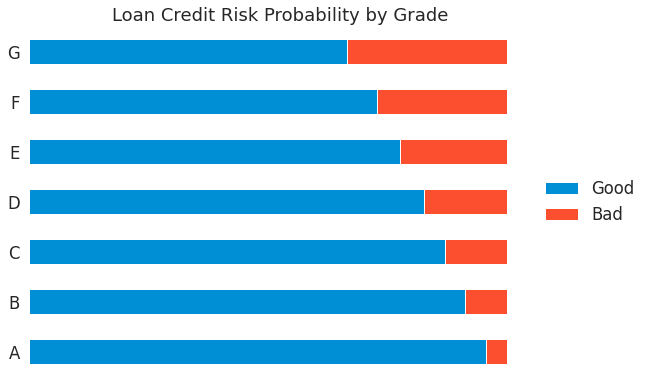

In [234]:
stacked_bar_plot(data=data_viz, x='grade', y='target', annot=False)

We have a clear pattern. The grade column has a natural order based on the loan status probability
- Grade A has the highest probability to have a good loan status.
- Grade G has the lowest probability to have a good loan status

### Sub Grade

In [202]:
columns = data_viz['target']

col_tmp = ['sub_grade']
attr_crosstab = pd.DataFrame()

for col in col_tmp:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Good', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,Bad,Good
0,Sub Grade (A1),0.021,0.979
1,Sub Grade (A2),0.032,0.968
2,Sub Grade (A3),0.039,0.961
3,Sub Grade (A4),0.048,0.952
4,Sub Grade (A5),0.057,0.943
5,Sub Grade (B1),0.066,0.934
6,Sub Grade (B2),0.077,0.923
7,Sub Grade (B3),0.088,0.912
8,Sub Grade (B4),0.096,0.904
9,Sub Grade (B5),0.106,0.894


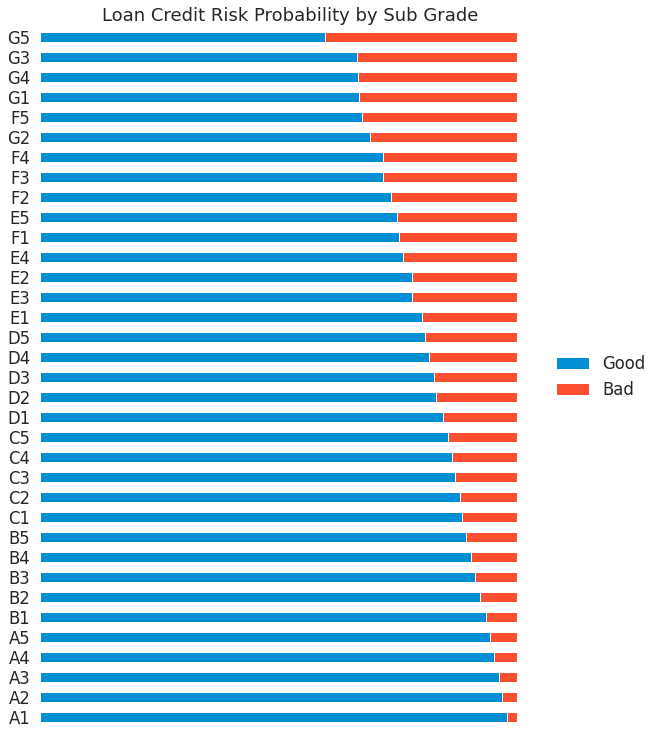

In [239]:
_, ax = plt.subplots(figsize=(8,12))
stacked_bar_plot(data=data_viz, x='sub_grade', y='target', ax=ax, annot=False)

Here, we also have a clear pattern. The sub-grade column has a natural order based on the loan status probability. However, if we take a look at some points, we can see that:
- Sub-grade E3 has a higher probability to have good loan status than sub-grade E2
- Sub-grade F1 has a higher probability to have good loan status than sub-grade E5
- Sub-grade G2 has a higher probability to have good loan status than sub-grade G1 and F5
- Sub-grade G4 has a higher probability to have good loan status than sub-grade G3
<br>

Maybe, there are some outliers in the dataset that cause the probability is not matching the grade. In other words, the company gives a "good grade" to a borrower, but it turns out that the borrower has a bad loan status. So, we can't only rely on the grade or sub-grade feature to predict the borrowers' loan status. But, it might be a good feature to be used in our model.
<br><br>

However, since the grade and sub-grade have similar information, maybe I will just drop one of these features later. Just to avoid the curse of dimensionality and multicollinearity.

### Term

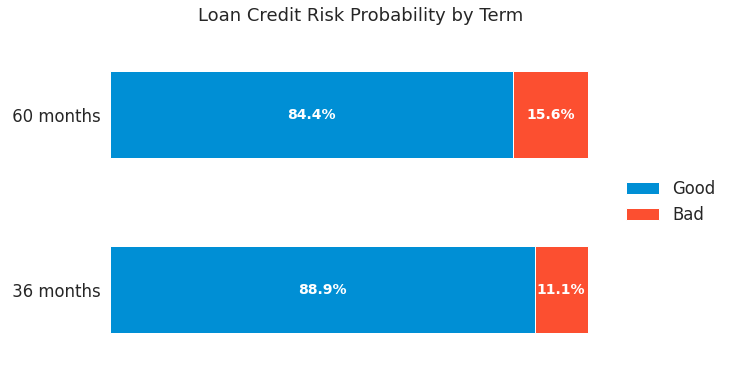

In [221]:
stacked_bar_plot(data=data_viz, x='term', y='target')

### Employment Length

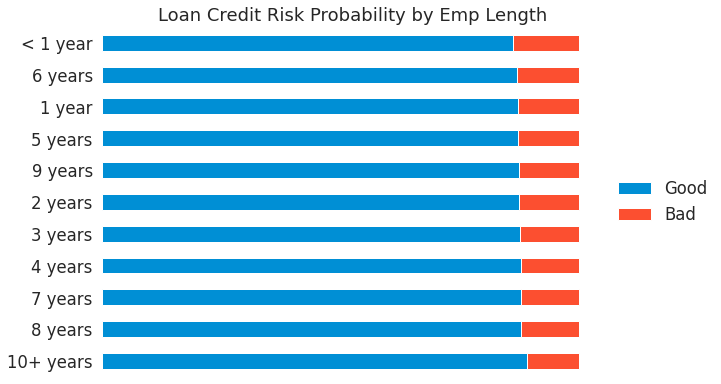

In [249]:
stacked_bar_plot(data=data_viz, x='emp_length', y='target', annot=False)

### Home Ownership

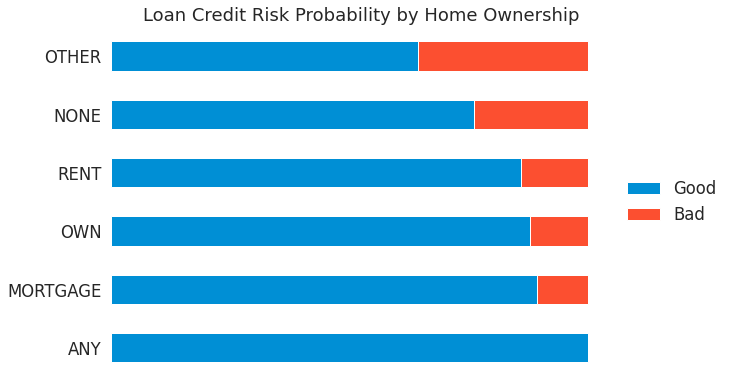

In [247]:
stacked_bar_plot(data=data_viz, x='home_ownership', y='target', annot=False)

### Payment Plan

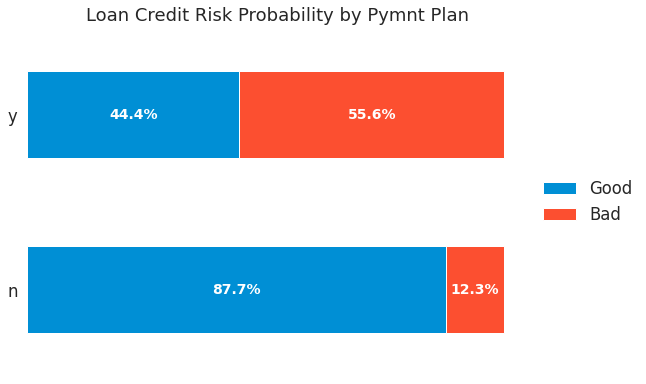

In [254]:
stacked_bar_plot(data=data_viz, x='pymnt_plan', y='target')

### Purpose

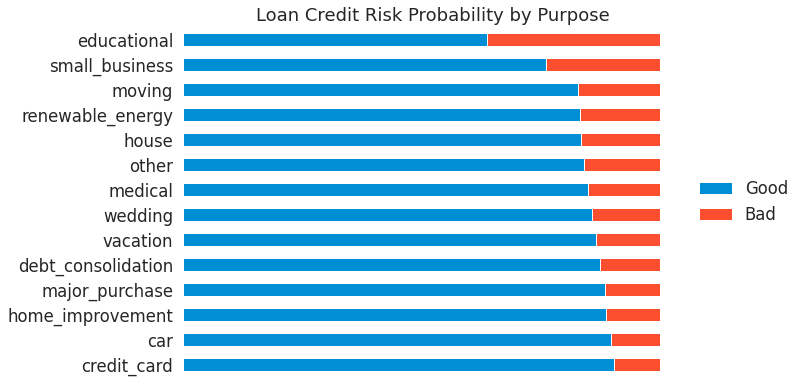

In [256]:
stacked_bar_plot(data=data_viz, x='purpose', y='target', annot=False)

### Address State

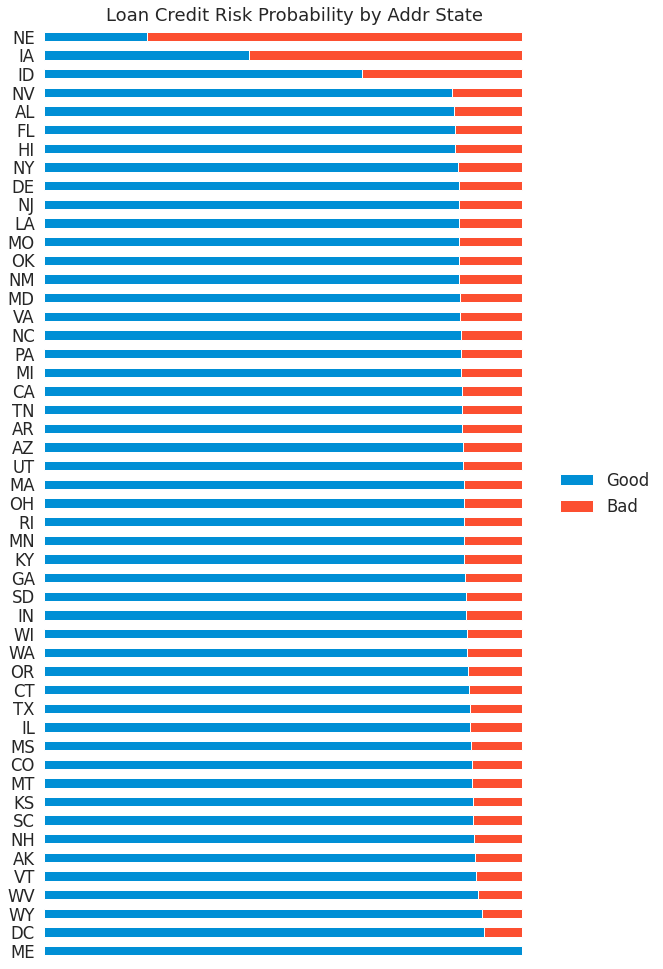

In [258]:
_, ax = plt.subplots(figsize=(8,16))
stacked_bar_plot(data=data_viz, x='addr_state', y='target', ax=ax, annot=False)

### Initial List Status

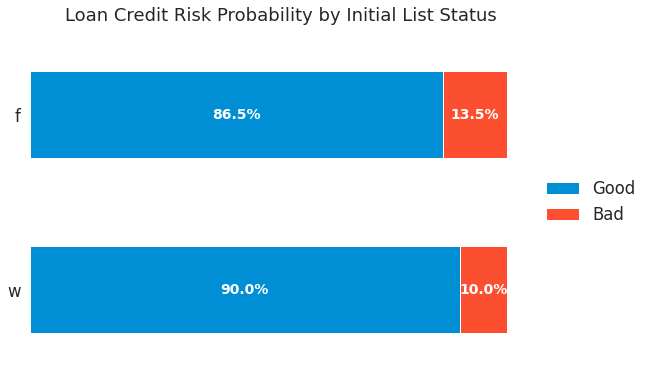

In [262]:
stacked_bar_plot(data=data_viz, x='initial_list_status', y='target')

# Reference and Further Reading
- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))
- Analytics Vidhya. "What is Multicollinearity? Here’s Everything You Need to Know" ([source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/))
- ResidentMario. "missingno documentation" ([source](https://github.com/ResidentMario/missingno))